In [1]:
import numpy as np
import matplotlib.pyplot as plt

filename = "res_cluster_all.txt"
folder_to_save = "imgs_cluster_new"

class experiment:
    def __init__(self, n):
        self.n = n
        self.threads = []
        self.timesFirstApproach = []
        self.timesSecondApproach = []

    def calcScale(self):
        # self.omp_threads = self.threads[:-1]
        self.omp_boostFirst = []
        self.omp_boostSecond = []

        for i in range(len(self.timesFirstApproach)):
            self.omp_boostFirst.append(self.timesFirstApproach[0] / self.timesFirstApproach[i] )
            self.omp_boostSecond.append(self.timesSecondApproach[0] / self.timesSecondApproach[i] )
    
class experiment_new:
    def __init__(self, n):
        self.n = n
        self.threads = []
        self.times_1 = []
        self.times_2 = []
        self.times_3 = []
        self.times = []
        self.times_errors = []

    def avg(self):
        length = len(self.times_1)
        self.times = []
        self.times_errors = []
        for i in range(length):
            current_results = np.array([self.times_1[i], self.times_2[i], self.times_3[i]])
            avg_time = np.mean(current_results)
            self.times.append(avg_time)

            avg_error = np.sqrt(np.sum([(x - avg_time)**2 for x in current_results ]) / 3)
            self.times_errors.append(avg_error)


    def calcScale(self):
        # self.omp_threads = self.threads[:-1]
        self.omp_boost = []
        self.omp_boost_err = []
        zeros_relative_error = self.times_errors[0] / self.times[0]

        for i in range(len(self.times)):
            self.omp_boost.append(self.times[0] / self.times[i] )

            ith_relative_error = self.times_errors[i] / self.times[i]
            full_relative_error = np.sqrt(zeros_relative_error**2 + ith_relative_error**2)
            self.omp_boost_err.append(self.times[0] * full_relative_error  / self.times[i] )
  
def amdal(N, S):
    return N / (N * S + (1 - S))


allExps = []

with open(filename, 'r') as inpf:
    for l in inpf.readlines():
        s = l.strip().split()
        if s:
            if s[0] == 'n':
                currentExp = experiment_new(int(s[2]))
                allExps.append(currentExp)
            elif s[0] != 'Threads'  and s[0] != 'Max':
                currentExp.threads.append(int(s[0]))
                currentExp.times_1.append(float(s[1]))
                currentExp.times_2.append(float(s[2]))
                currentExp.times_3.append(float(s[3]))
        


In [26]:
# for event in allExps:
#     event.avg()
#     # plt.scatter(event.threads, event.times, label="first approach")
#     plt.errorbar(event.threads, event.times, yerr=event.times_errors, label="f", fmt='o')
#     print(event.times)
#     print(event.times_errors)
#     plt.title("Matrix size: " + str(event.n))
#     plt.xlabel("Num of threads (counts)")
#     plt.ylabel("Time of calculations (s)")
#     plt.legend()
#     plt.show()

9


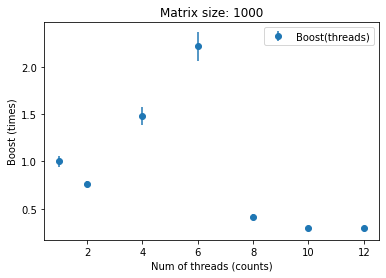

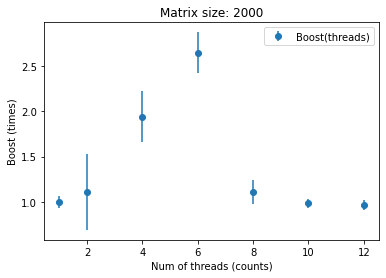

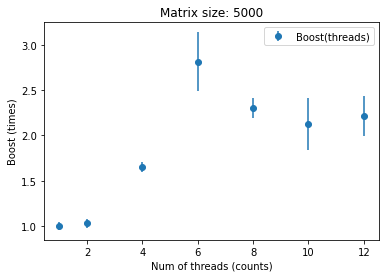

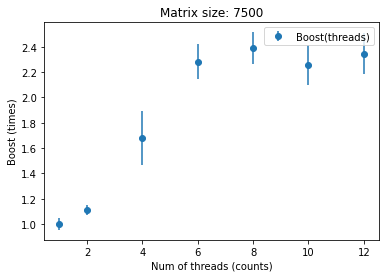

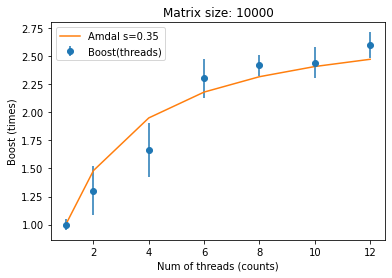

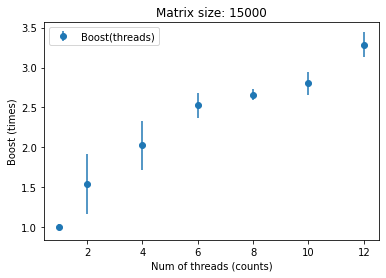

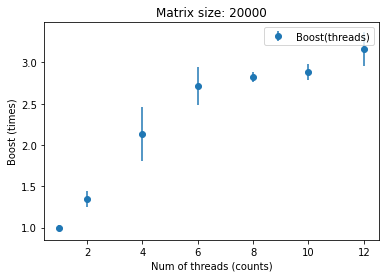

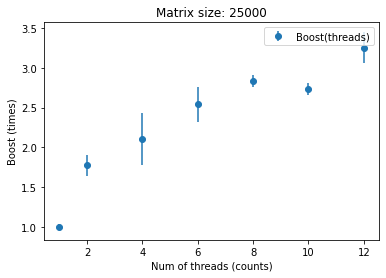

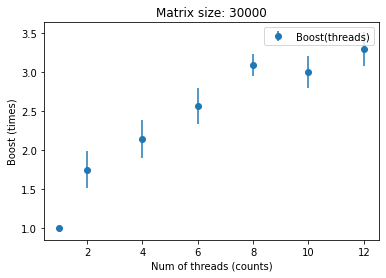

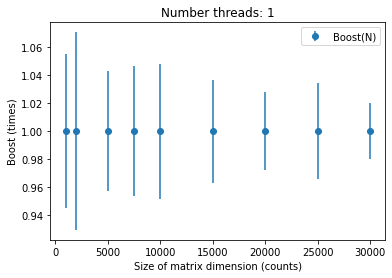

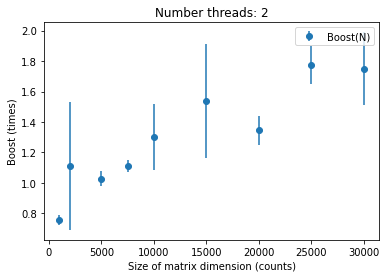

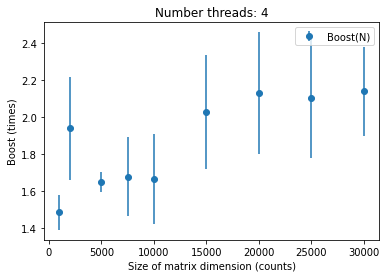

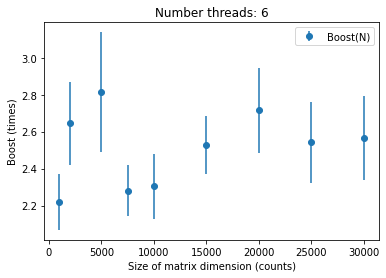

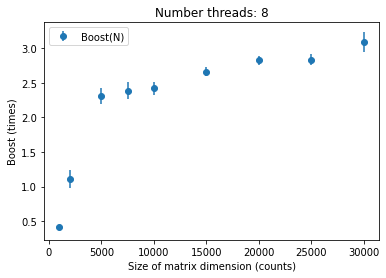

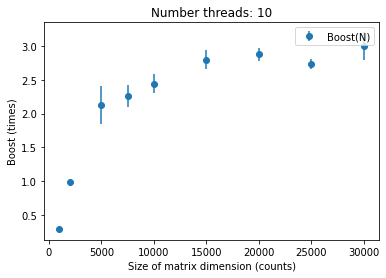

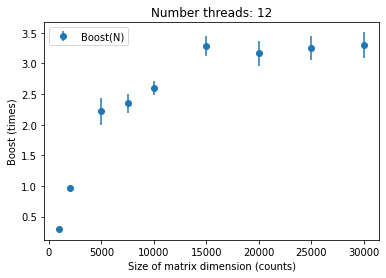

In [35]:
helper = allExps[0]
ns = []
n = len(allExps)
m = len(helper.times)

boost = np.zeros((n, m))
boost_err = np.zeros_like(boost)

print(len(allExps))

for idx, event in enumerate(allExps):
    event.avg()
    event.calcScale()
    ns.append(event.n)
    for i, value in enumerate(event.omp_boost):
        boost[idx][i] = value
        boost_err[idx][i] = event.omp_boost_err[i]
    plt.errorbar(event.threads, event.omp_boost, yerr=event.omp_boost_err, fmt='o', label="Boost(threads)")

    if event.n == 10000:
        s = 0.35
        plt.plot(event.threads, amdal(np.array(event.threads), s), label="Amdal s={}".format(s))

    plt.title("Matrix size: " + str(event.n))
    plt.xlabel("Num of threads (counts)")
    plt.ylabel("Boost (times)")
    plt.legend()
    plt.savefig(folder_to_save + "/Boost_vs_threads_n_" + str(event.n), dpi=300, bbox_inches='tight')
    plt.show()

for idx, n_threads in enumerate(allExps[0].threads):
    plt.errorbar(ns, boost[:,idx],yerr=boost_err[:,idx], fmt='o', label="Boost(N)")
    plt.title("Number threads: " + str(n_threads))
    plt.xlabel("Size of matrix dimension (counts)")
    plt.ylabel("Boost (times)")
    plt.legend()
    plt.savefig(folder_to_save + "/Boost_vs_n_threads_" + str(n_threads), dpi=300, bbox_inches='tight')
    plt.show()

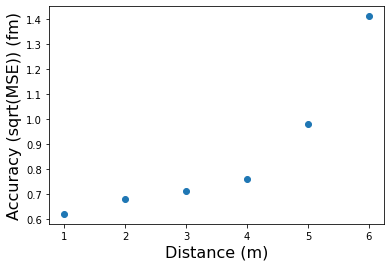

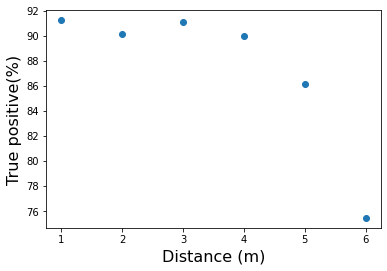

In [7]:
distances = [1, 2, 3, 4, 5, 6,]
accuracy = [0.62, 0.68, 0.71, 0.76, 0.98, 1.41,]
accuracy_percent = [91.23, 90.12, 91.08, 89.97, 86.17, 75.44,]

plt.scatter(distances, accuracy)
plt.xlabel("Distance (m)", fontsize=16)
plt.ylabel("Accuracy (sqrt(MSE)) (fm)", fontsize=16)
plt.savefig("C:/Projects/Microchannel/Presentations/23_02_23/Distances_regression", dpi=300, bbox_inches='tight')
plt.show()

plt.scatter(distances, accuracy_percent)
plt.xlabel("Distance (m)", fontsize=16)
plt.ylabel("True positive(%)", fontsize=16)
plt.savefig("C:/Projects/Microchannel/Presentations/23_02_23/Distances_percent", dpi=300, bbox_inches='tight')
plt.show()